In [1]:
!pip install --upgrade "jax[cuda]" -f https://storage.googleapis.com/jax-releases/jax_releases.html

Looking in links: https://storage.googleapis.com/jax-releases/jax_releases.html


In [2]:


import jax
import jax.numpy as jnp
from jax.typing import ArrayLike
import matplotlib.pyplot as plt
jax.config.update("jax_enable_x64", True) # To improve precision of GPU computation


In [3]:
# Create some input / output data
x = jnp.array([0.03, 0.19, 0.34, 0.46, 0.78, 0.81, 1.08, 1.18, 1.39, 1.60, 1.65, 1.90])
y = jnp.array([0.67, 0.85, 1.05, 1.0, 1.40, 1.5, 1.3, 1.54, 1.55, 1.68, 1.73, 1.6 ])

print(x)
print(y)


[0.03 0.19 0.34 0.46 0.78 0.81 1.08 1.18 1.39 1.6  1.65 1.9 ]
[0.67 0.85 1.05 1.   1.4  1.5  1.3  1.54 1.55 1.68 1.73 1.6 ]


In [4]:
# Define 1D linear regression model
@jax.jit
def f(x:jax.Array, phi0:float, phi1:float)->jax.Array:
  # TODO :  Replace this line with the linear regression model (eq 2.4)
  y = phi0+ phi1*x

  return y

In [5]:
def plot(x, y, phi0, phi1):
    fig,ax = plt.subplots()
    ax.scatter(x,y)
    plt.xlim([0,2.0])
    plt.ylim([0,2.0])
    ax.set_xlabel('Input, ')
    ax.set_ylabel('Output, ')
    # Draw line
    x_line = jnp.arange(0,2,0.01)
    y_line = f(x_line, phi0, phi1)
    plt.plot(x_line, y_line,'b-',lw=2)

    plt.show()


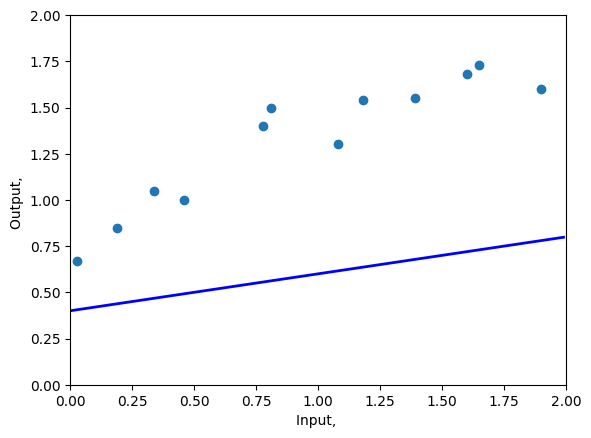

In [6]:
# Set the intercept and slope as in figure 2.2b
phi0 = 0.4 ; phi1 = 0.2
# Plot the data and the model
plot(x,y,phi0,phi1)


In [8]:
# Function to calculate the loss
@jax.jit
def compute_loss(x:jax.Array,y:jax.Array,phi0:float,phi1:float):

  # TODO Replace this line with the loss calculation (equation 2.5)

  loss = jnp.sum(jnp.square(y-phi0-phi1*x))


  return loss


In [9]:
# Compute the loss for our current model
loss = compute_loss(x,y,phi0,phi1)
print(f'Your Loss = {loss:3.2f}, Ground truth =7.07')

Your Loss = 7.07, Ground truth =7.07


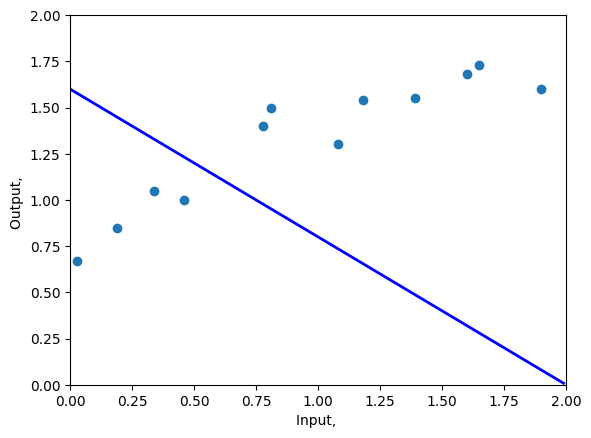

Your Loss = 10.28, Ground truth =10.28


In [10]:
# Set the intercept and slope as in figure 2.2c
phi0 = 1.60 ; phi1 =-0.8
# Plot the data and the model
plot(x,y,phi0,phi1)
loss = compute_loss(x,y,phi0,phi1)
print(f'Your Loss = {loss:3.2f}, Ground truth =10.28')

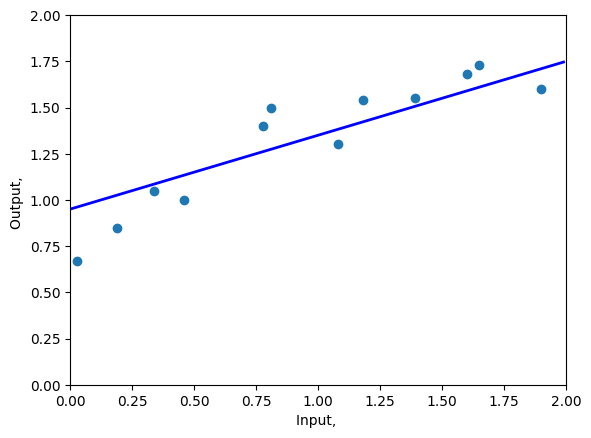

Your Loss = 0.26


In [14]:


# TO DO -- Change the parameters manually to fit the model
# First fix phi1 and try changing phi0 until you can't make the loss go down any more
# Then fix phi0 and try changing phi1 until you can't make the loss go down any more
# Repeat this process until you find a set of parameters that fit the model as in figure 2.2d
# You can either do this by hand, or if you want to get fancy, write code to descent automatically in this way
# Start at these values:
phi0 = 0.95 ; phi1 =0.4

plot(x,y,phi0,phi1)
print(f'Your Loss = {compute_loss(x,y,phi0,phi1):3.2f}')



In [35]:
# Make a 2D grid of possible phi0 and phi1 values
phi0_mesh, phi1_mesh = jnp.meshgrid(jnp.arange(0.0,2.0,0.02), jnp.arange(-1.0,1.0,0.02))

# Make a 2D array for the losses
all_losses = jnp.zeros_like(phi1_mesh)
# Run throught each 2D combination of phi0, phi1 and compute loss
row_size,col_size= all_losses.shape

for i in jnp.arange(0,row_size,1):
  for j in jnp.arange(0,col_size,1):
    all_losses.at[i,j].set(compute_loss(x,y, phi0_mesh[i,j], phi1_mesh[i,j]))



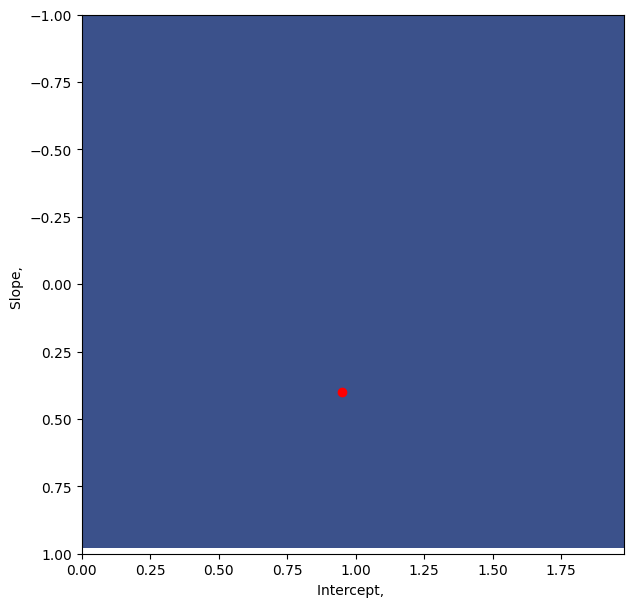

In [36]:
# Plot the loss function as a heatmap
fig = plt.figure()
ax = plt.axes()
fig.set_size_inches(7,7)
levels = 256
ax.contourf(phi0_mesh, phi1_mesh, all_losses ,levels)
levels = 40
ax.contour(phi0_mesh, phi1_mesh, all_losses ,levels, colors=['#80808080'])
ax.set_ylim([1,-1])
ax.set_xlabel('Intercept, ')
ax.set_ylabel('Slope, ')

# Plot the position of your best fitting line on the loss function
# It should be close to the minimum
ax.plot(phi0,phi1,'ro')
plt.show()
